### Data Exploration

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#loading the 5 datasets into a dictionary of 5 files: 
data_dict = dict()
for file in os.listdir('data'):
    data_dict[file] = arff.loadarff('data/' + file)

In [3]:
df1 = pd.DataFrame(data_dict['1year.arff'][0])

In [4]:
df1.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

In [5]:
df1.shape

(7027, 65)

In [6]:
#Creating a dictionary of feature names so they can be easily accessible:
columns_text = """
- X1 net profit / total assets 
- X2 total liabilities / total assets 
- X3 working capital / total assets 
- X4 current assets / short-term liabilities 
- X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 
- X6 retained earnings / total assets 
- X7 EBIT / total assets 
- X8 book value of equity / total liabilities 
- X9 sales / total assets 
- X10 equity / total assets 
- X11 (gross profit + extraordinary items + financial expenses) / total assets 
- X12 gross profit / short-term liabilities 
- X13 (gross profit + depreciation) / sales 
- X14 (gross profit + interest) / total assets 
- X15 (total liabilities * 365) / (gross profit + depreciation) 
- X16 (gross profit + depreciation) / total liabilities 
- X17 total assets / total liabilities 
- X18 gross profit / total assets 
- X19 gross profit / sales 
- X20 (inventory * 365) / sales 
- X21 sales (n) / sales (n-1) 
- X22 profit on operating activities / total assets 
- X23 net profit / sales 
- X24 gross profit (in 3 years) / total assets 
- X25 (equity - share capital) / total assets 
- X26 (net profit + depreciation) / total liabilities 
- X27 profit on operating activities / financial expenses 
- X28 working capital / fixed assets 
- X29 logarithm of total assets 
- X30 (total liabilities - cash) / sales 
- X31 (gross profit + interest) / sales 
- X32 (current liabilities * 365) / cost of products sold 
- X33 operating expenses / short-term liabilities 
- X34 operating expenses / total liabilities 
- X35 profit on sales / total assets 
- X36 total sales / total assets 
- X37 (current assets - inventories) / long-term liabilities 
- X38 constant capital / total assets 
- X39 profit on sales / sales 
- X40 (current assets - inventory - receivables) / short-term liabilities 
- X41 total liabilities / ((profit on operating activities + depreciation) * (12/365)) 
- X42 profit on operating activities / sales 
- X43 rotation receivables + inventory turnover in days 
- X44 (receivables * 365) / sales 
- X45 net profit / inventory 
- X46 (current assets - inventory) / short-term liabilities 
- X47 (inventory * 365) / cost of products sold 
- X48 EBITDA (profit on operating activities - depreciation) / total assets 
- X49 EBITDA (profit on operating activities - depreciation) / sales 
- X50 current assets / total liabilities 
- X51 short-term liabilities / total assets 
- X52 (short-term liabilities * 365) / cost of products sold) 
- X53 equity / fixed assets 
- X54 constant capital / fixed assets 
- X55 working capital 
- X56 (sales - cost of products sold) / sales 
- X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) 
- X58 total costs /total sales 
- X59 long-term liabilities / equity 
- X60 sales / inventory 
- X61 sales / receivables 
- X62 (short-term liabilities *365) / sales 
- X63 sales / short-term liabilities 
- X64 sales / fixed assets
- YYY bankrupt"""

In [7]:
col_dict = dict()
col_dict_reverse = dict()
col_dict = col_dict.fromkeys(df1.columns)
col_dict_reverse = col_dict_reverse.fromkeys([i[5:].strip(' ') for i in columns_text.splitlines()[1:]])

In [8]:
for col, s in zip(col_dict.keys(), columns_text.splitlines()[1:]):
    col_dict[col] = s[5:].strip(' ')

In [9]:
#list(col_dict_reverse.keys())
for col, s in zip(list(col_dict_reverse.keys()), df1.columns):
    #k = col[5:].strip(' ')
    col_dict_reverse[col] = s

In [10]:
#renaming the class key to bankrupt:
col_dict['bankrupt'] = col_dict['class']
del col_dict['class']

In [11]:
#df1.rename(columns = col_dict, inplace = True)

In [12]:
df1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [13]:
#Formatting column names
#df1.columns = df1.columns.map(lambda x: x.strip(" "))

In [14]:
#Notice the bakrupt (target) var is a string with an unwanted character. Let's cast it to int
df1.rename(columns = {'class':'bankrupt'}, inplace = True)
import re
df1['bankrupt'] = df1['bankrupt'].str.decode('utf-8')
df1['bankrupt'] = df1['bankrupt'].map(lambda x: re.sub('b','',x)).astype('int')

In [15]:
print("Only Numeric Features: ")
print(df1.select_dtypes(exclude = ['float64', 'int64']))

Only Numeric Features: 
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[7027 rows x 0 columns]


All features are numeric and formatted correctly. The dataframe looks good to go for some initial data exploration

In [16]:
#Calculating percentage of nulls for each feature and putting it in new df
nulls_df = pd.DataFrame(df1.isna().sum()/df1.shape[0])
nulls_df.columns = ['nulls']

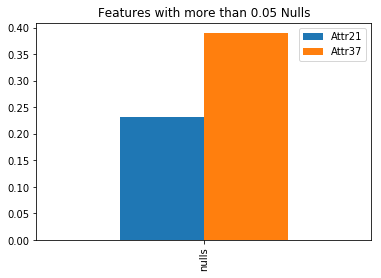

In [17]:
#Printing features with more than 10% of null instances 
thres = 0.05
mask = (nulls_df > thres)

nulls_df[mask].dropna().T.plot(kind = 'bar')
plt.title("Features with more than %.2f Nulls" %thres)
plt.show()

In [18]:
#Looking up attr21 and 37:
print("Columns with high percentage of nulls: \n", col_dict['Attr21'], '\n', col_dict['Attr37'])

Columns with high percentage of nulls: 
 sales (n) / sales (n-1) 
 (current assets - inventories) / long-term liabilities


Luckily, only two features have a high number of nulls. We can probably remove them but before we do so, let's investigate a bit further how whether if doing so may affect our data

In [19]:
idx_21 = df1.loc[df1['Attr21'].isna() == True].index
idx_37 = df1.loc[df1['Attr37'].isna() == True].index

Text(0.5, 1.0, 'Attr21 Nulls vs bankruptcy')

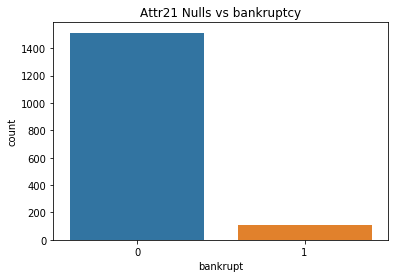

In [20]:
sns.countplot(x = 'bankrupt', data = df1.loc[idx_21])
plt.title("Attr21 Nulls vs bankruptcy")

Text(0.5, 1.0, 'Attr37 Nulls vs bankruptcy')

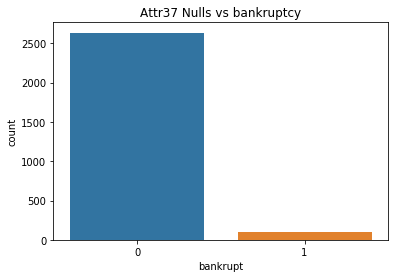

In [21]:
sns.countplot(x = 'bankrupt', data = df1.loc[idx_37])
plt.title("Attr37 Nulls vs bankruptcy")

The Majority of nulls are non bankrupt companies

Let's investigate feature distributions at a glance. Before we start plotting features, let's get a sense for the scale of each variable 

In [22]:
sorted_cols = df1.describe().sort_values(by = 'std', axis = 1).columns
desc_df = df1.describe()
desc_df.sort_values(by = 'std', axis = 1, inplace=True)

In [23]:
#desc_df.iloc[0:10]
df2 = df1[sorted_cols].iloc[:,1:20].melt(var_name='groups', value_name='vals')

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


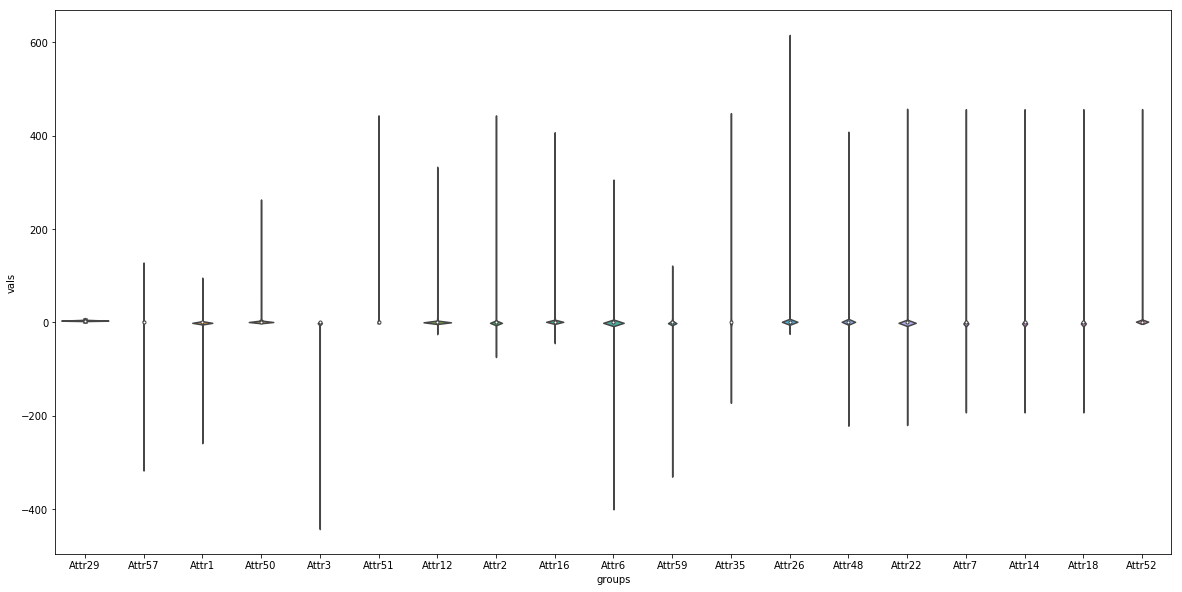

In [24]:
plt.figure(figsize = (20,10))
ax = sns.violinplot(x = 'groups', y = 'vals', data = df2)
plt.show()

In [26]:
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

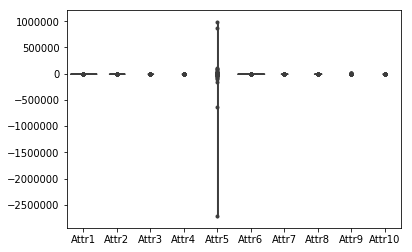

In [27]:
cols = ['Attr' + str(i+1) for i in range(10)]
sns.violinplot(data=df1[cols],inner="points")

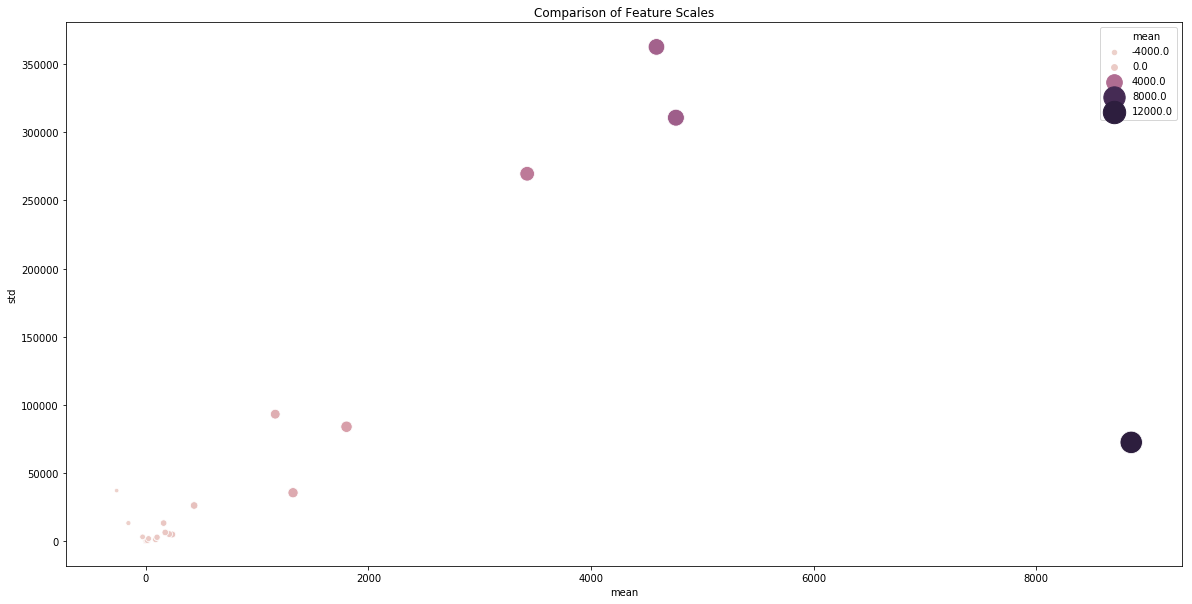

In [28]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="mean", y="std", data=desc_df.T, hue = 'mean', size='mean', sizes = (20,500))
plt.title("Comparison of Feature Scales")
plt.show()

In [29]:
from scipy import stats
import math
#Correlation between continuous and binary variables
pbcorr_list = []
for i in range(1, len(df1.columns)):
    if math.isnan(stats.pointbiserialr(df1['Attr' + str(i)],df1['bankrupt'])[0]) != True:
        pbcorr_list.append(('Att'+str(i), stats.pointbiserialr(df1['Attr' + str(i)],df1['bankrupt'])[0]))

In [30]:
sorted(pbcorr_list, key = lambda tup: tup[1])

[('Att55', -0.022040153957230697),
 ('Att19', -0.004444712162920826),
 ('Att31', -0.004413843376435808),
 ('Att23', -0.004350056216844583),
 ('Att13', -0.0028624599361745744),
 ('Att62', -0.002679078328597032),
 ('Att44', -0.002494867588748255),
 ('Att43', -0.0024696151154820324),
 ('Att20', -0.0023953079056083957),
 ('Att30', -0.0023919528599573646),
 ('Att58', -0.0023894589912474788),
 ('Att39', -0.0018525799599408287),
 ('Att42', -0.0018395014864024126),
 ('Att56', 0.0023902577828861424),
 ('Att49', 0.0025168668700973683)]

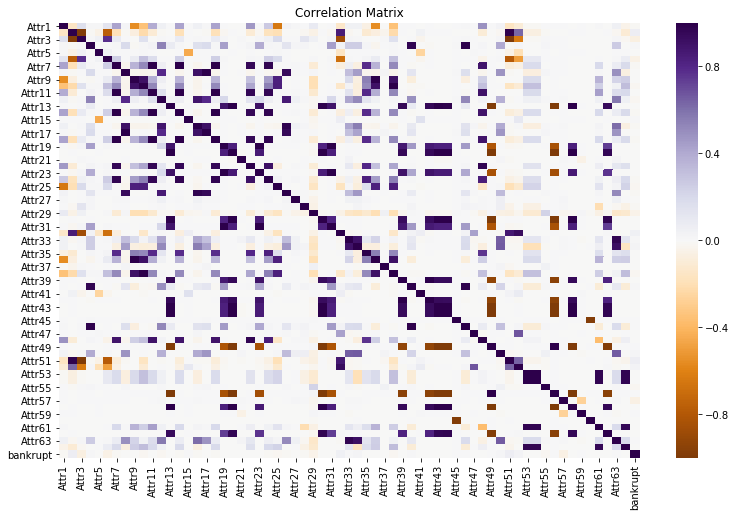

In [31]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(13,8))
sns.heatmap(corr, ax=ax, cmap = 'PuOr', cbar=True)
plt.title("Correlation Matrix")
plt.show()

Visualizing a large correlation matrix such as this one can be challenging. Let's pick the features that have the largest correlation with the dependent variable to glance which may be the most important to start investigating

In [32]:
"""mask = corr[corr>0.5]

pos_corr  = []
neg_corr = []

for i in mask.index:
    for k in mask.columns:
        if i == k:
            continue
        elif mask.loc[i,k] > 0.5:
            pos_corr.append(''.join(i + '###' + k))
        elif mask.loc[i,k] < - 0.5:
            neg_corr.append(''.join(i + '###' + k))  """       
            
#Can be done with list comprehension
#But the quickest way to do this is nlargest pandas method

"mask = corr[corr>0.5]\n\npos_corr  = []\nneg_corr = []\n\nfor i in mask.index:\n    for k in mask.columns:\n        if i == k:\n            continue\n        elif mask.loc[i,k] > 0.5:\n            pos_corr.append(''.join(i + '###' + k))\n        elif mask.loc[i,k] < - 0.5:\n            neg_corr.append(''.join(i + '###' + k))  "

In [33]:
largest = corr.nlargest(10,'bankrupt')['bankrupt']
smallest = corr.nsmallest(10, 'bankrupt')['bankrupt']

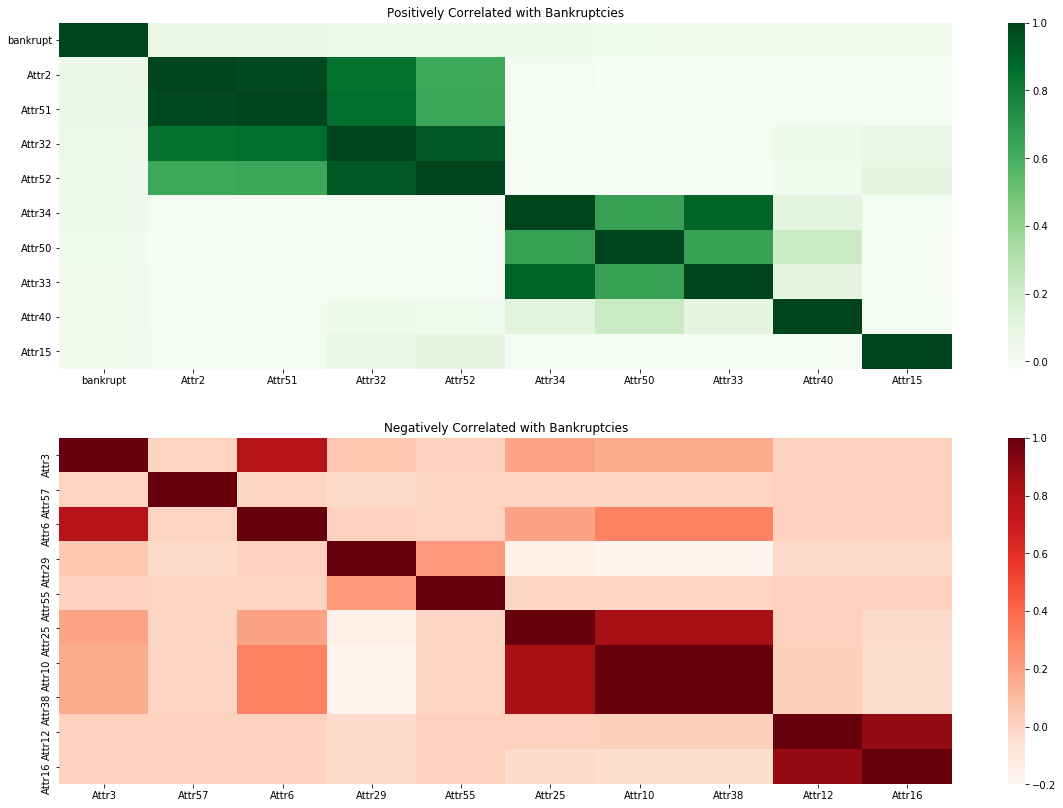

In [34]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,14))

sns.heatmap(corr.loc[largest.index, largest.index], ax=ax1, cmap = 'Greens', cbar=True)
ax1.set_title("Positively Correlated with Bankruptcies")

sns.heatmap(corr.loc[smallest.index, smallest.index], ax=ax2, cmap = 'Reds', cbar=True)
ax2.set_title("Negatively Correlated with Bankruptcies")

plt.show()

In [35]:
print("Looking up 10 columns that are most positively correlated with bankruptcy: ")
[col_dict[i] for i in largest.index]

Looking up 10 columns that are most positively correlated with bankruptcy: 


['bankrupt',
 'total liabilities / total assets',
 'short-term liabilities / total assets',
 '(current liabilities * 365) / cost of products sold',
 '(short-term liabilities * 365) / cost of products sold)',
 'operating expenses / total liabilities',
 'current assets / total liabilities',
 'operating expenses / short-term liabilities',
 '(current assets - inventory - receivables) / short-term liabilities',
 '(total liabilities * 365) / (gross profit + depreciation)']

In [36]:
print("Looking up 10 columns that are most negatively correlated with bankruptcy: ")
[col_dict[i] for i in smallest.index]

Looking up 10 columns that are most negatively correlated with bankruptcy: 


['working capital / total assets',
 '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
 'retained earnings / total assets',
 'logarithm of total assets',
 'working capital',
 '(equity - share capital) / total assets',
 'equity / total assets',
 'constant capital / total assets',
 'gross profit / short-term liabilities',
 '(gross profit + depreciation) / total liabilities']

#### Null Handling Decision:
    - remove attr21 and attr37
    - impute remaining nulls with mean 

In [37]:
df1 = df1.drop(columns = ['Attr21', 'Attr37'])

In [38]:
df1.fillna(df1.mean(), inplace=True)

### Transformed Dataset

In [ ]:
#Storing as variable causes data type issues. Will use Pickle instead
#%store df1

In [40]:
df1.to_pickle('data/pickle_files/df1_pickle')